# NYC Crime Statistics Explore 

1. Explore crime categories and level of offense in the New York City
2. Show the trend of crime categories and amount from Jan 1, 2019 to Sept 30, 2019
3. Define which borough is relatively safer compared with other boroughs

## Data Source 

The dataset comes from NYC OpenData, [NYPD Complaint Data Current (Year to Date)](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243).
It includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) for all complete quarters so far Nov 1, 2019.

## Data Features 

There are 347k rows and 35 columns. The attributes include Borough Name, Crime Type, Level of Offense, information of suspects and victims,etc. However, the data before 2019 are absent, so we only use data after 2019 for this presentation. Also, there is no data after Sept 30, 2019 in the dataset. You can find more details about the dataset [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243)


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
import requests
from IPython.core.display import HTML

In [2]:
# read data into notebook
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CMPLNT_NUM  ADDR_PCT_CD    BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0   660160752          103     QUEENS   09/30/2019     14:00:00   09/30/2019   
1   219394661           40      BRONX   09/30/2019     13:00:00   09/30/2019   
2   184671534           18  MANHATTAN   09/30/2019     11:40:00   09/30/2019   
3   825219244           48      BRONX   09/30/2019     02:00:00   09/30/2019   
4   457673231           32  MANHATTAN   09/29/2019     20:30:00          NaN   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  SUSP_SEX  \
0     14:01:00        COMPLETED        NaN          NaN  ...         M   
1     14:00:00        COMPLETED        NaN        772.0  ...       NaN   
2     11:45:00        COMPLETED        NaN          NaN  ...         M   
3     03:30:00        COMPLETED        NaN          NaN  ...         U   
4          NaN        COMPLETED        NaN          NaN  ...         U   

  TRANSIT_DISTRICT  VIC_AGE_GROUP VIC_RACE VIC_SEX X_COORD_CD Y_COORD_CD  \
0              NaN          25-44  UNKNOWN       M        NaN        NaN   
1              NaN        UNKNOWN  UNKNOWN       E        NaN        NaN   
2              NaN          25-44    WHITE       F        NaN        NaN   
3              NaN          25-44    WHITE       F        NaN        NaN   
4              NaN        UNKNOWN  UNKNOWN       D        NaN        NaN   

  Latitude  Longitude Lat_Lon  
0      NaN        NaN     NaN  
1      NaN        NaN     NaN  
2      NaN        NaN     NaN  
3      NaN        NaN     NaN  
4      NaN        NaN     NaN  

[5 rows x 35 columns]

## Preprocessing
Filter data by date. Only keep data after year 2010 and the columns we need

In [3]:
# Make sure the data type is correct
print('The data type of date attribute is {}'.format(df.CMPLNT_FR_DT.dtype))

# Change CMPLNT_FR_DT data type from object to datetime
df['CMPLNT_FR_DT']=pd.to_datetime(df['CMPLNT_FR_DT'],errors='coerce')
print('Now the data type of date attribute changes to {}'.format(df.CMPLNT_FR_DT.dtype))

The data type of date attribute is object
Now the data type of date attribute changes to datetime64[ns]


In [4]:
df = df.dropna(subset=['CMPLNT_FR_DT'])
df = df[df['CMPLNT_FR_DT']>'2018-12-31']
df = df[['BORO_NM','CMPLNT_FR_DT','LAW_CAT_CD','OFNS_DESC']]
df = df.dropna()

In [5]:
df.head()

BORO_NM CMPLNT_FR_DT   LAW_CAT_CD      OFNS_DESC
0     QUEENS   2019-09-30    VIOLATION  HARRASSMENT 2
1      BRONX   2019-09-30       FELONY          ARSON
2  MANHATTAN   2019-09-30  MISDEMEANOR     SEX CRIMES
3      BRONX   2019-09-30       FELONY           RAPE
4  MANHATTAN   2019-09-29       FELONY  GRAND LARCENY

## Crime Categories and level of offese

There are 61 categories in total, let's display the top 5 categories


Text(0.5, 0, 'Category')

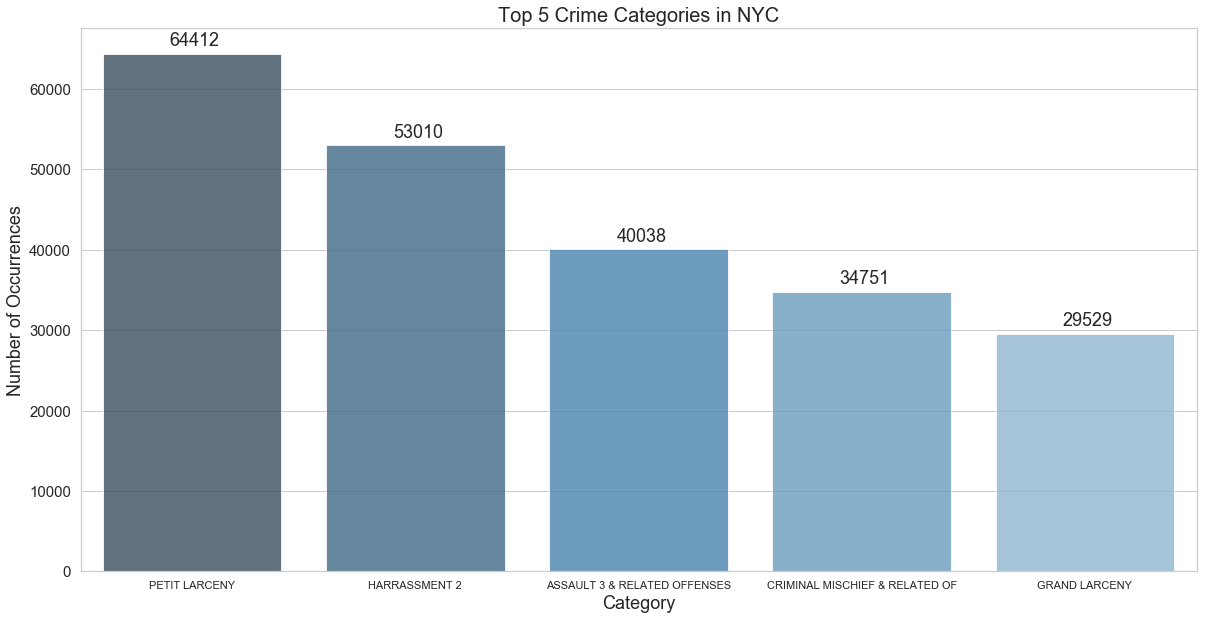

In [6]:
print("There are {} categories in total, let's display the top 5 categories".format(len(df.OFNS_DESC.value_counts())))
df.OFNS_DESC.value_counts

cat_counts = df.OFNS_DESC.value_counts()[:5]

# Categories barplot
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(cat_counts.index,cat_counts.values,alpha=0.8,palette=("Blues_d"))
for i,j in enumerate(cat_counts.values):
    plt.annotate(str(j),(i-0.1,j+1000),fontsize=18)
plt.title('Top 5 Crime Categories in NYC',fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Category', fontsize=18)

Text(0.5, 0, 'Level of Offense')

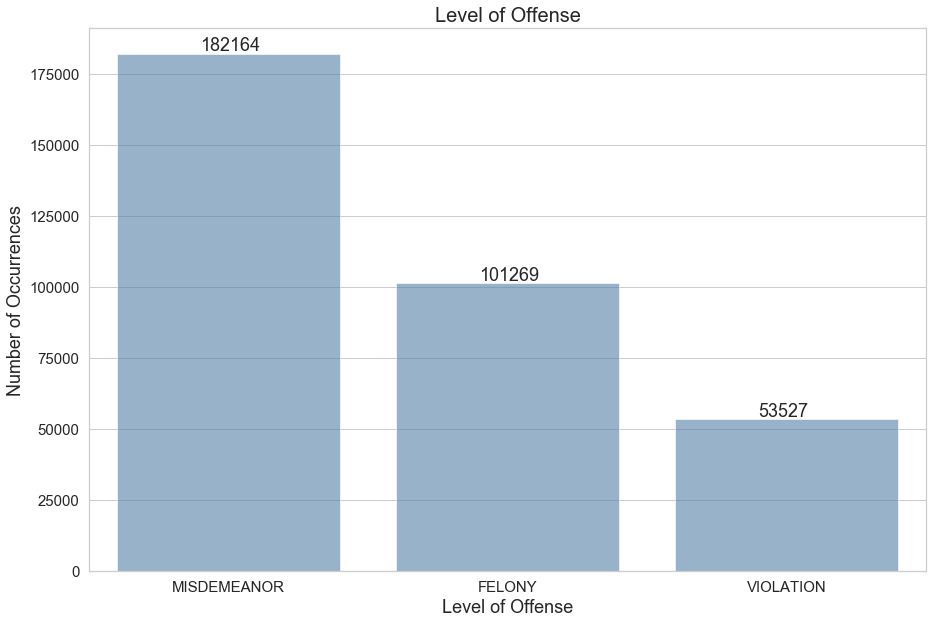

In [7]:
# level of offense
level_counts = df.LAW_CAT_CD.value_counts()
plt.figure(figsize=(15,10))
sns.barplot(level_counts.index,level_counts.values,alpha=0.6,color='steelblue')
for i,j in enumerate(level_counts.values):
    plt.annotate(str(j),(i-0.1,j+1000),fontsize=18)
plt.title('Level of Offense',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Level of Offense', fontsize=18)

## Crime Distribution in NYC

Text(0.5, 0, 'Borough')

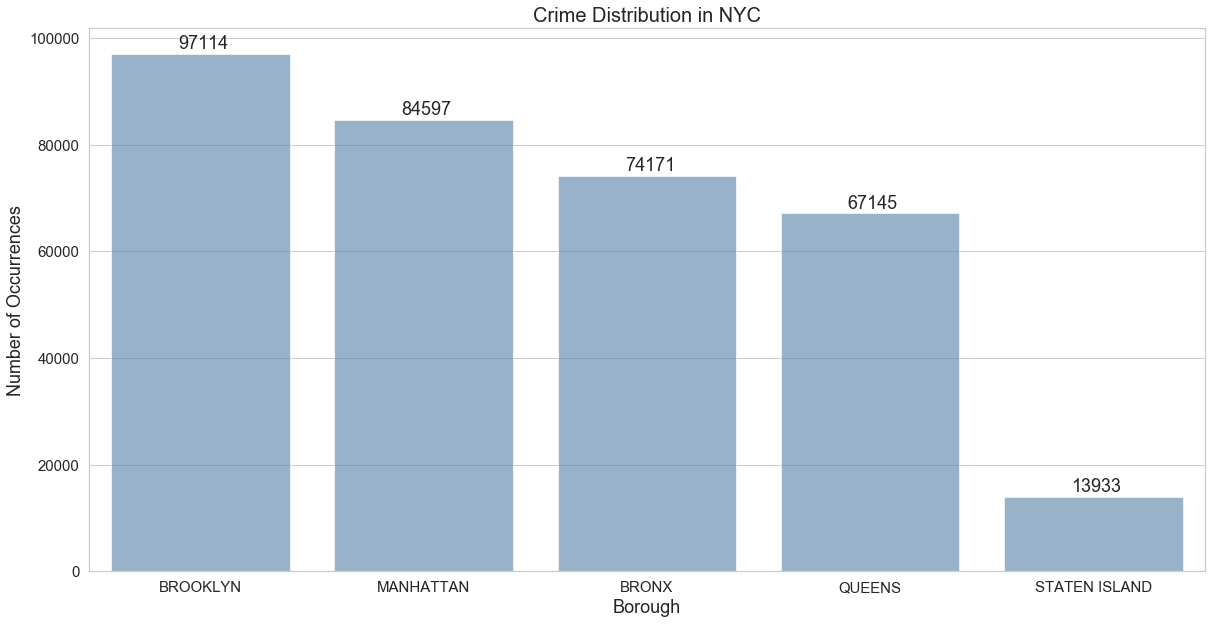

In [8]:
boro_counts = df.BORO_NM.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(boro_counts.index,boro_counts.values,alpha = 0.6,color='steelblue')
for i,j in enumerate(boro_counts.values):
    plt.annotate(str(j),(i-0.1,j+1000),fontsize=18)
plt.title('Crime Distribution in NYC',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Borough', fontsize=18)

Text(0.5, 0, 'Borough')

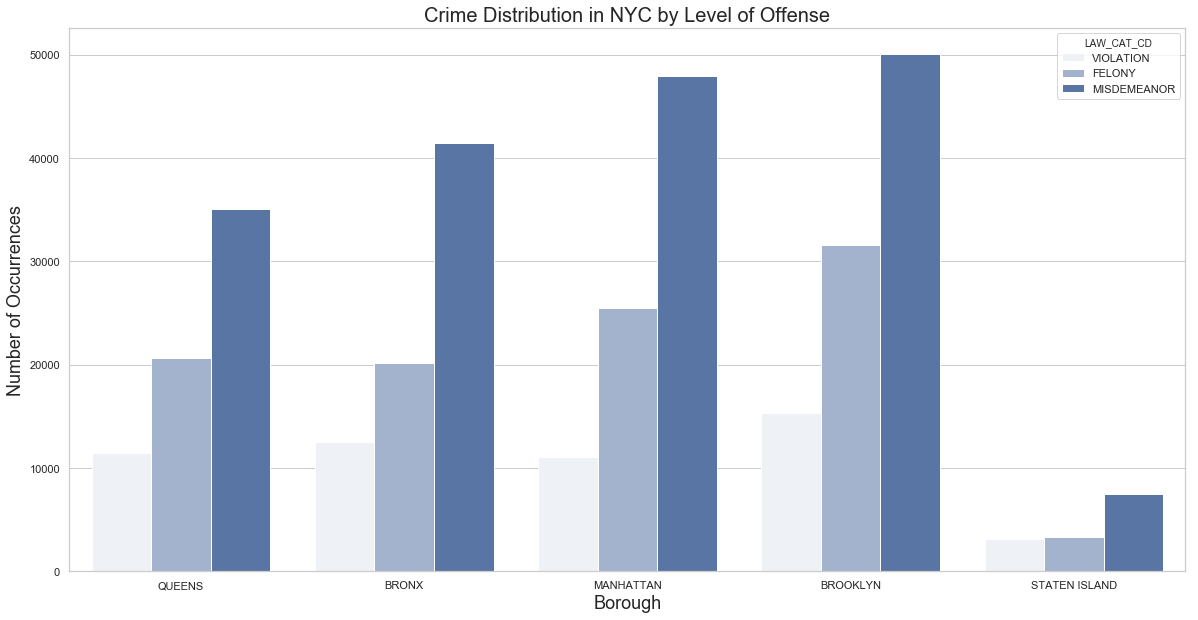

In [9]:
# Crime distribution in NYC by level of offence
plt.figure(figsize=(20,10))
sns.countplot(x='BORO_NM',hue='LAW_CAT_CD',data=df,color='b')
plt.title('Crime Distribution in NYC by Level of Offense',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Borough', fontsize=18)

## Crime Occurrences in 2019

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

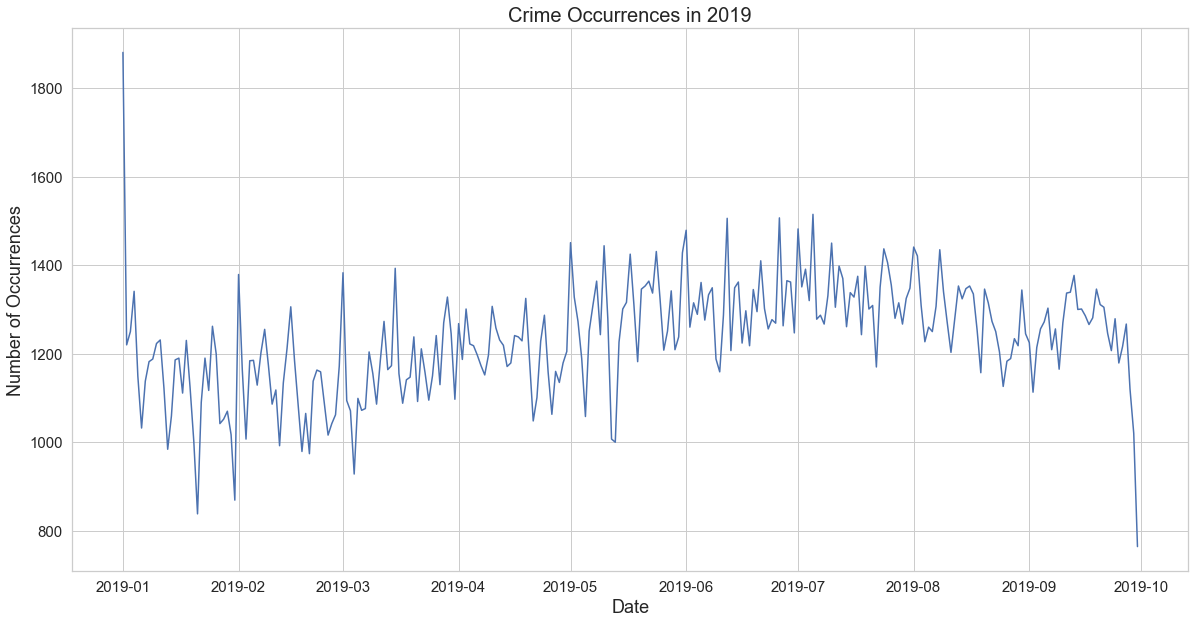

In [10]:
dt_counts = df.CMPLNT_FR_DT.value_counts()
plt.figure(figsize=(20,10))
sns.lineplot(dt_counts.index,dt_counts.values)
plt.title('Crime Occurrences in 2019',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Date', fontsize=18)

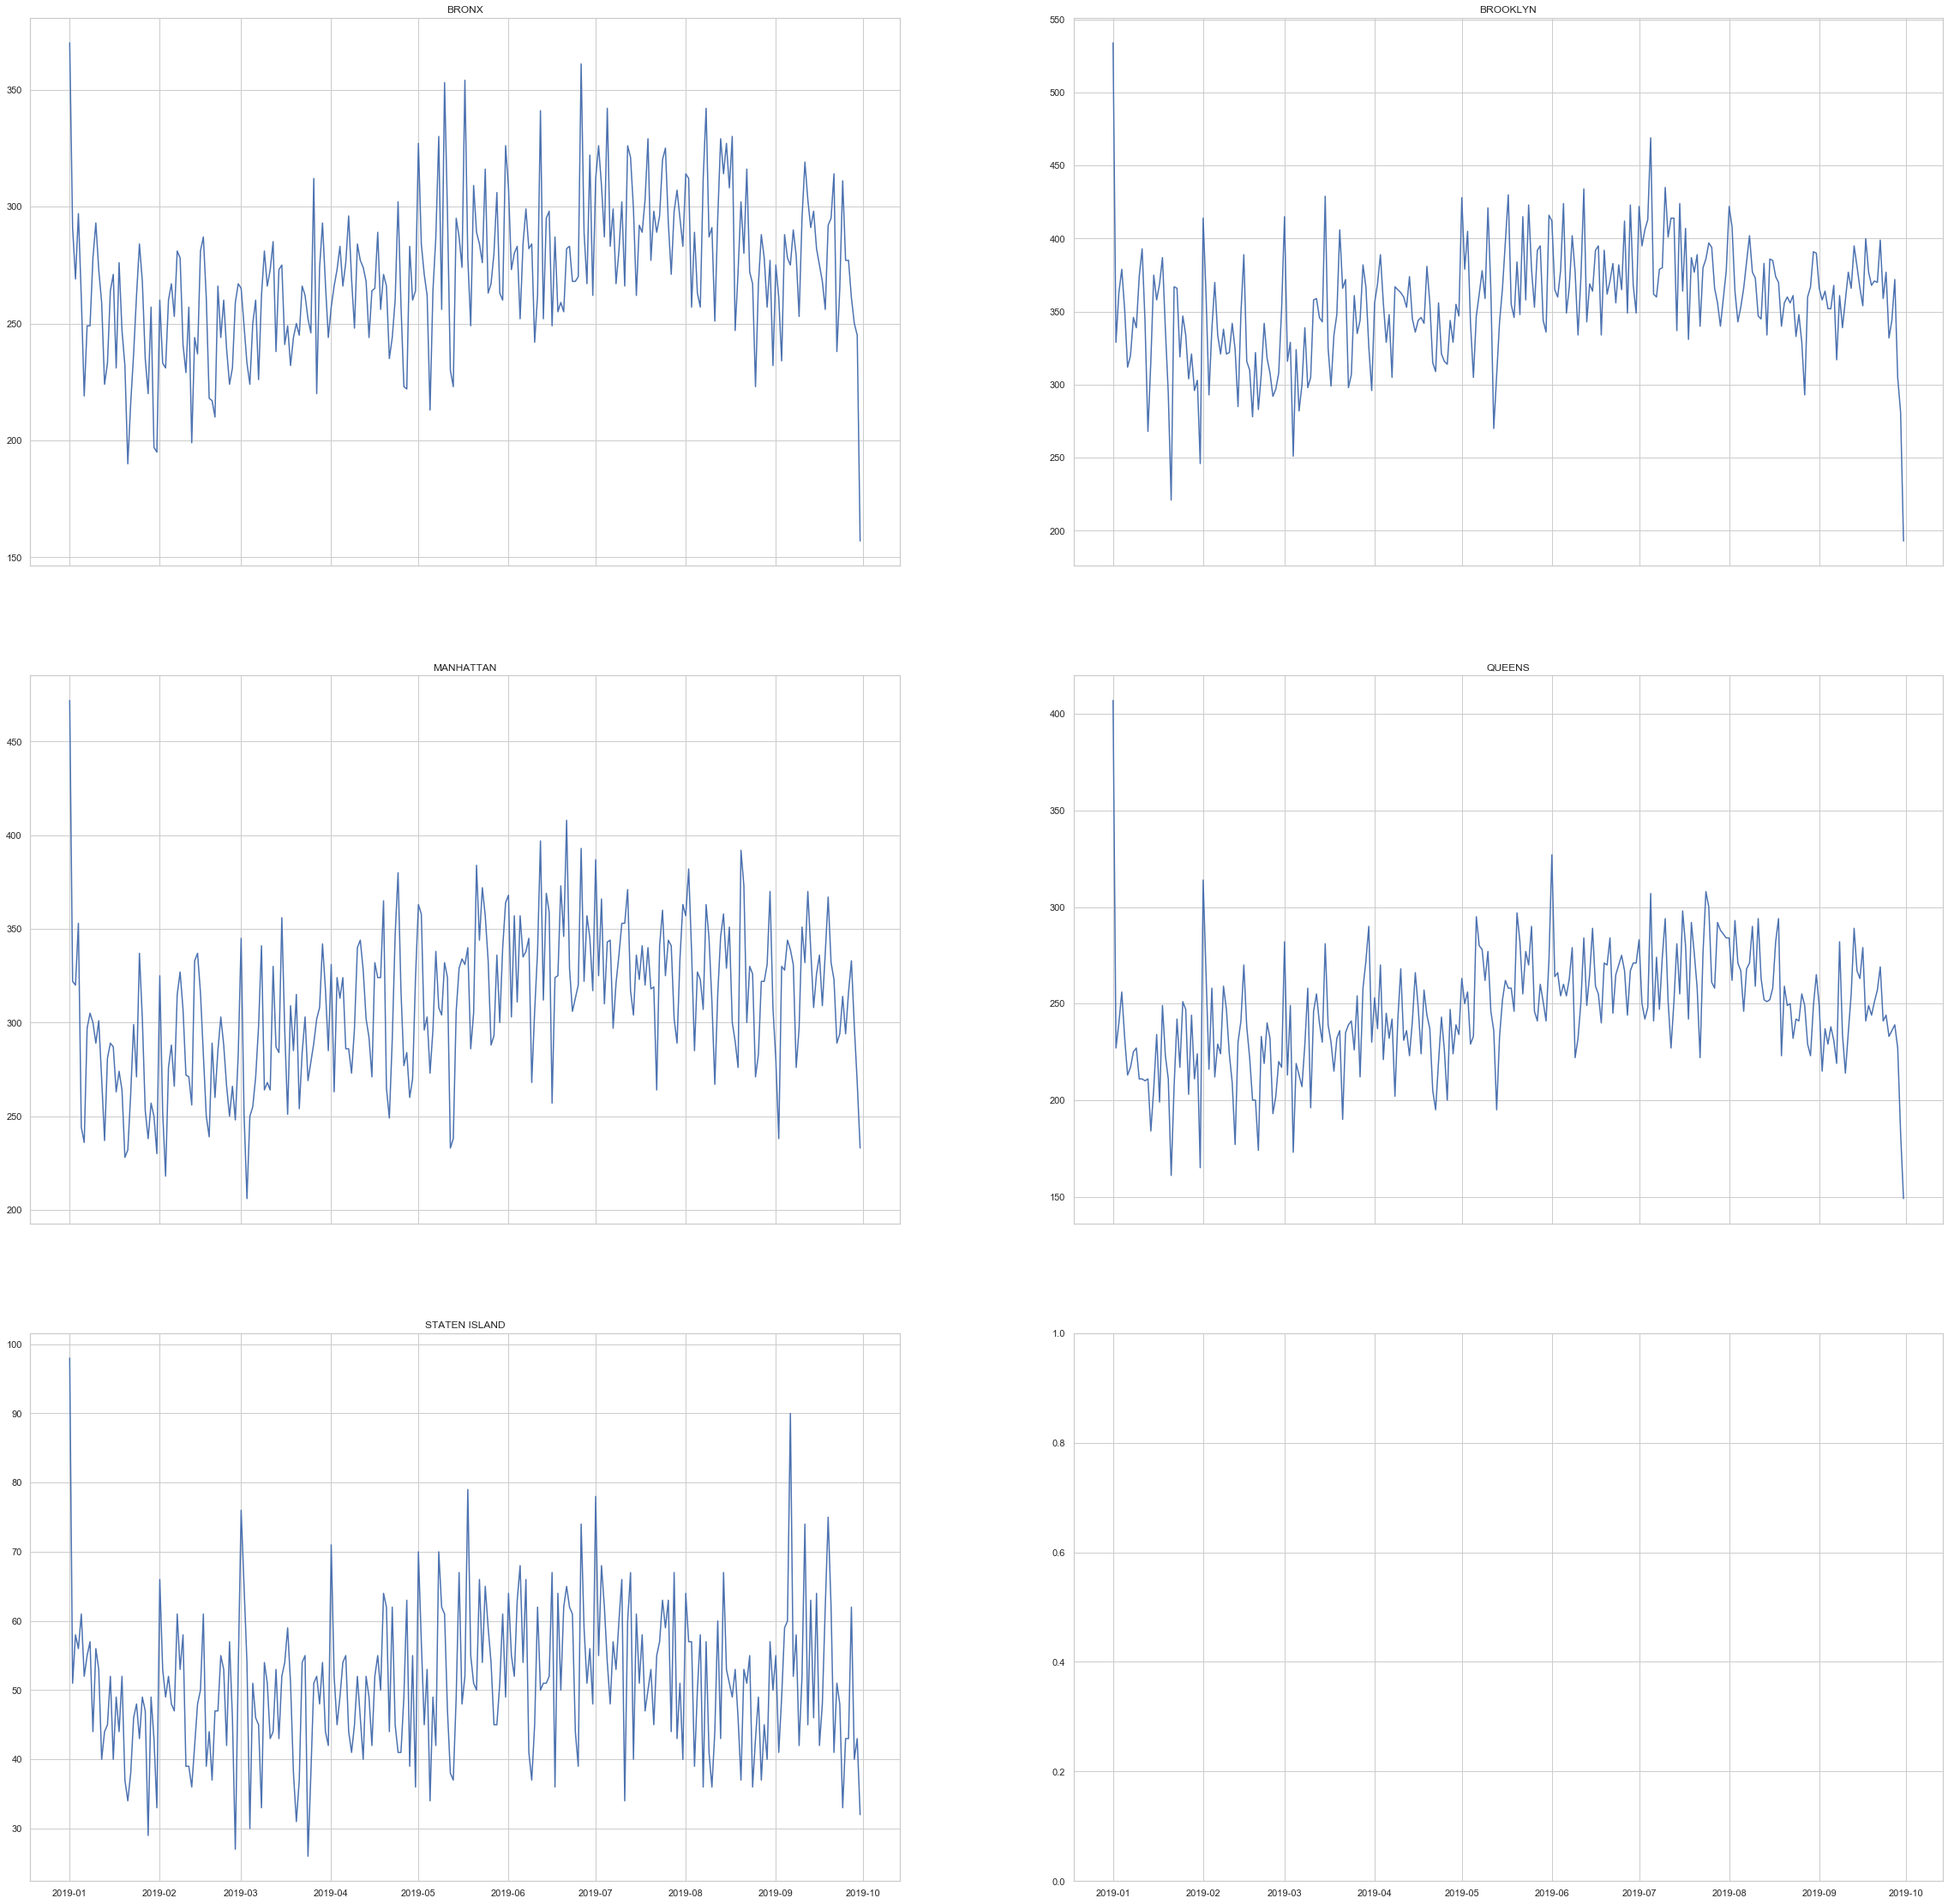

In [11]:
fig,axes = plt.subplots(3,2,figsize=(40,40),sharex=True)
df_boro_dt = df.groupby(['CMPLNT_FR_DT','BORO_NM']).count()
# reorganize columns and rows into pivot table
df_pivot = df_boro_dt.pivot_table(index='CMPLNT_FR_DT',columns='BORO_NM',values='OFNS_DESC')
def draw_ax(rows,cols,num):
    axes[rows,cols].plot(df_pivot.index,df_pivot.iloc[:,num])
    axes[rows,cols].title.set_text(df_pivot.columns[num])
draw_ax(0,0,0)
draw_ax(0,1,1)
draw_ax(1,0,2)
draw_ax(1,1,3)
draw_ax(2,0,4)

## Show the Crime Distribution on Map

The geographic data of Borough Boundaries are collected from **NYC OpenData**. You can find it from [https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm)


In [12]:
nyc_geo = r'Borough Boundaries.geojson'

In [13]:
# restructure a dataframe 
df_map = df['BORO_NM'].value_counts().to_frame()
df_map = df_map.reset_index()
df_map.columns = ['Borough','Count']
df_map.Borough = df_map.Borough.str.capitalize()
df_map.replace('Staten island','Staten Island',inplace=True)
df_map

Borough  Count
0       Brooklyn  97114
1      Manhattan  84597
2          Bronx  74171
3         Queens  67145
4  Staten Island  13933

In [17]:
nyc_map = folium.Map(location=(40.730610, -73.935242),zoom_start=10)
folium.Choropleth(geo_data=nyc_geo,
                 data=df_map,
                 columns = ['Borough','Count'],
                 key_on='feature.properties.boro_name',
                 fill_color='YlOrRd',
                 fill_opacity=0.6,
                 line_opacity=0.2,
                 legend_name = 'Crime Distribution in NYC 2019'
                 ).add_to(nyc_map)

The map cannot render outside notebook IDE, please see screen shot attached.

In [18]:
nyc_map